<a href="https://colab.research.google.com/github/Besita/Besita/blob/main/digit_recognization_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(13)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1) (60000,)
Train: X=(60000, 28, 28, 1), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


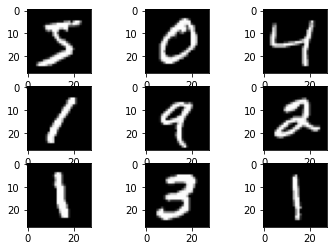

In [ ]:
(x_train_orig, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train_orig.reshape(-1,28,28,1) / 255.0
print(x_train_orig.shape)
print(x_train.shape, y_train.shape)

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train_orig[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

X=x_train
Y=y_train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(validation_split = 0.2)

In [ ]:
def Charts(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(MaxPool2D(2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.3))

model.add(Dense(128, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(optimizer = Adam(learning_rate = 3e-4), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                      

In [ ]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        acc = logs['accuracy']
        val_acc = logs['val_accuracy']
        if acc >= 0.999 and val_acc >= 0.99995:
            self.model.stop_training = True

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 1.2645 - accuracy: 0.6032 - val_loss: 1.4180 - val_accuracy: 0.5388
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3245 - accuracy: 0.8984 - val_loss: 0.6411 - val_accuracy: 0.8298
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2062 - accuracy: 0.9359 - val_loss: 0.4020 - val_accuracy: 0.9028
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1537 - accuracy: 0.9525 - val_loss: 0.3214 - val_accuracy: 0.9176
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1260 - accuracy: 0.9605 - val_loss: 0.2545 - val_accuracy: 0.9317
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1080 - accuracy: 0.9662 - val_loss: 0.2063 - val_accuracy: 0.9424
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.1899 - val_accuracy: 0.9414
Epoch 8/20
30

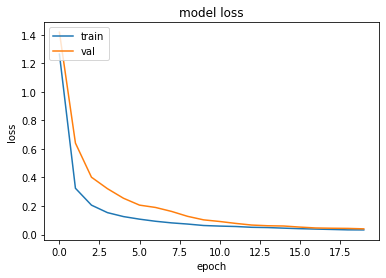

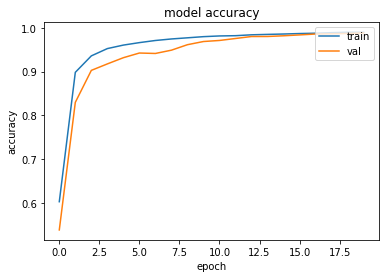

In [ ]:
history = model.fit(gen.flow(X, y = Y, subset = 'training', batch_size = 1600), validation_data=gen.flow(X, y = Y, subset = 'validation', batch_size = 1600),
                    epochs = 20, verbose = 1, callbacks = [CustomCallbacks()])
Charts(history)

In [ ]:
model.save('final_model.h5')

recognised digit is 7
recognised digit is 2
recognised digit is 1
recognised digit is 0
recognised digit is 4
recognised digit is 1
recognised digit is 4
recognised digit is 9
recognised digit is 5


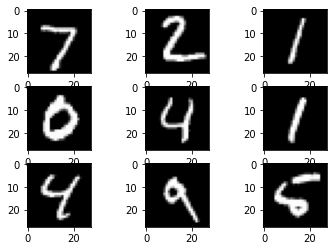

In [ ]:
model = load_model('final_model.h5')

from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
  img = x_test[i].reshape(-1, 28, 28, 1)/255.0
  predict_value = model.predict(img)
  digit = argmax(predict_value)
 
  plt.xlabel(print('recognised digit is',digit))